In [20]:
from keras.layers import Conv3D, MaxPool3D, Concatenate, Input

In [3]:
import nibabel as nib

def get_data(path):
    return nib.load(path).get_data()


def get_data_with_skull_scraping(path, PROB=0.5):
    arr = nib.load(path).get_data()
    ext = Extractor()
    prob = ext.run(arr)
    mask = prob > PROB
    arr = arr * mask
    return arr


def histeq(data):
    for slice_index in range(data.shape[2]):
        data[:, :, slice_index] = cv.equalizeHist(data[:, :, slice_index])
    return data


def to_uint8(data):
    data = data.astype(np.float)
    data[data < 0] = 0
    return ((data - data.min()) * 255.0 / data.max()).astype(np.uint8)

In [6]:
import matplotlib.pyplot as plt
import cv2 as cv
import nibabel as nib
import numpy as np
from deepbrain import Extractor

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
input = histeq(to_uint8(get_data_with_skull_scraping('C:\\Users\\StarDust\\Desktop\\imgs\\inception\\T1.nii')))

Instructions for updating:
Use tf.gfile.GFile.


C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


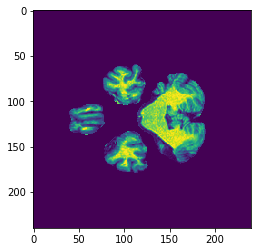

In [28]:
plt.imshow(input[:,:,10])

(1, 240, 240, 48)
(?, 8, 240, 240, 48)


NotImplementedError: Cannot convert a symbolic Tensor (strided_slice_1:0) to a numpy array.

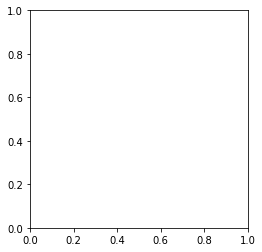

In [26]:
input2 = input[None, ...]
print(input2.shape)
inp = Input(shape=input2.shape)
tower1 = Conv3D(filters=8, kernel_size=(1, 1, 1), padding='same', activation='relu')(inp)
print(tower1.shape)
plt.imshow(tower1[0][:,:,24])